In [2]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
current_directory = os.getcwd()
model_path = os.path.join(os.path.dirname(current_directory), 'model')
sys.path.insert(0, model_path)
import np_init
import np_loss
import np_learn
import np_forward

# Defining a simple non-linear scalar field function

NOTE: input to our model must be in [0,1] (for most activation functions, but this changes depending on the activation func you are using since we forward pass by f(prev) * w + b)

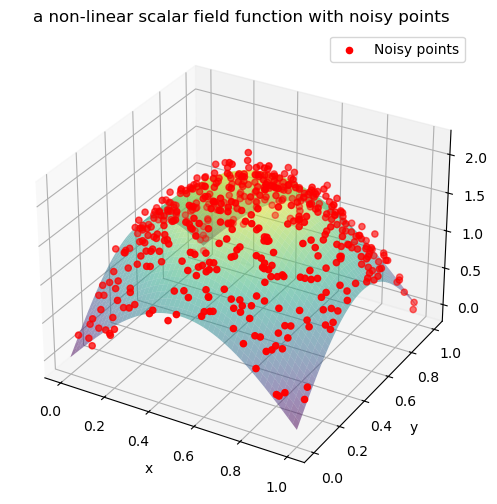

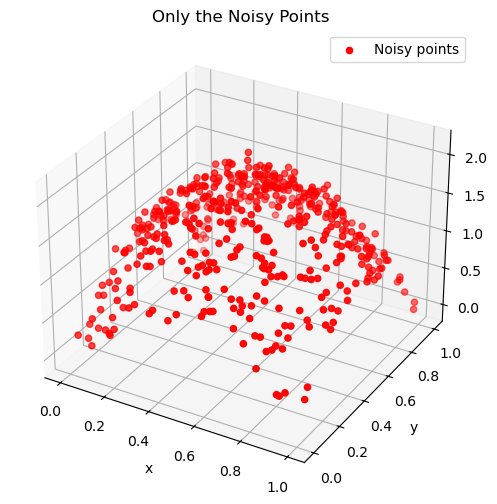

In [54]:
# a non-linear scalar field function
def quadratic_function(x, y):
    return np.sin(np.pi * x) + np.sin(np.pi * y)

x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
x, y = np.meshgrid(x, y)
z = quadratic_function(x, y)
np.random.seed(3)
x_points = np.random.uniform(0, 1, 500)
y_points = np.random.uniform(0, 1, 500)
z_points = quadratic_function(x_points, y_points) + np.random.normal(0, 0.1, 500)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
ax.scatter(x_points, y_points, z_points, color='red', label='Noisy points')
ax.set_title('a non-linear scalar field function with noisy points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, z_points, color='red', label='Noisy points')
ax.set_title('Only the Noisy Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

# Defining a ReLU Pred Code Network to learn this function implicitly

In [58]:
parameters = {
    "itr":100, #this is the number of iterations
    "l_rate":0.0001, #this is the learning rate
    "epochs":500, #this is the total number of epochs
    "beta":0.0001, #[TODO]
    "act_type": "RELU",
    "alpha": 1, #hyperparam for sigmoid activation
    "neurons": [2,64,64,1], #this basically says two nodes for input, 5 in hidden and 1 for the output
    "variance": [1,1,1,10] #this defines varaince for each layer, 1 for all layers but 10 for last, why though? [TODO]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

In [59]:
in_data = np.vstack((x_points, y_points)).T
out_data = z_points

### Predictions before training

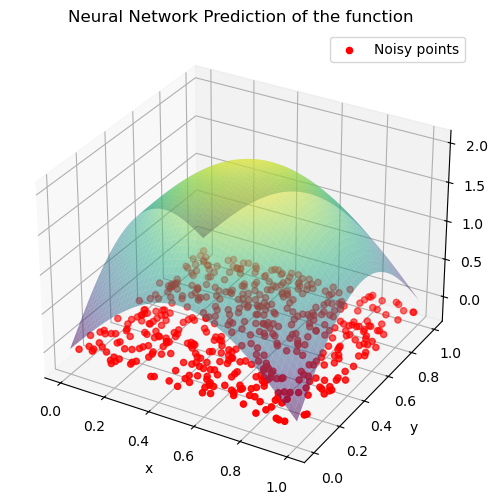

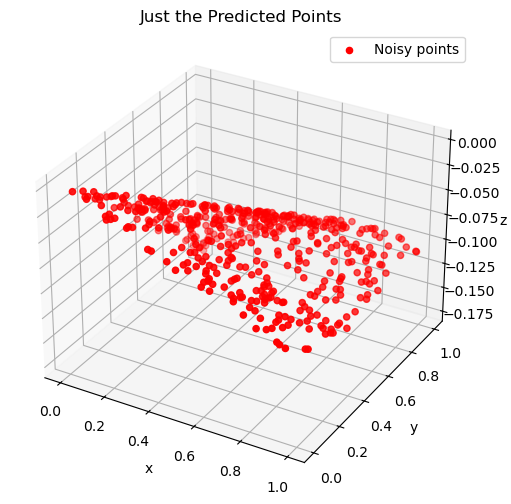

In [62]:
w,b = np_init.initializer(parameters["neurons"], "xavier")

#before training:
predicted = []
for data in in_data:
    pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
    predicted.append(pred)

predicted_Z = predicted
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Neural Network Prediction of the function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Just the Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [1]:
loss_values = []
for i in tqdm(range(parameters["epochs"])):
  np_learn.learn(in_data,out_data, w ,b, parameters)
  predicted = []
  for data in in_data:
      pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
      predicted.append(pred)

  predicted = np.array(predicted)
  mse = np_loss.MSE_error(out_data, predicted)
  loss_values.append(mse)


plt.plot(range(len(loss_values)), loss_values, '-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


NameError: name 'tqdm' is not defined

### After Training

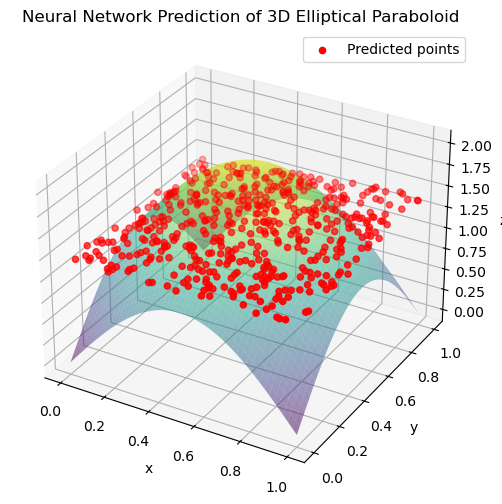

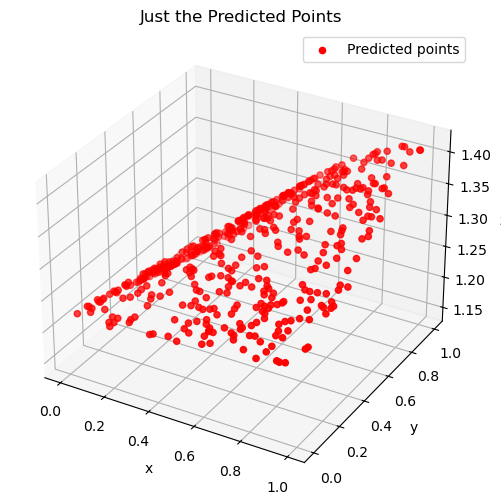

In [64]:
predicted_Z = predicted #since this only carries the value from the last learn iteration
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Neural Network Prediction of 3D Elliptical Paraboloid')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Just the Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

# Trying with Sigmoid

In [65]:
parameters = {
    "itr":100, #this is the number of iterations
    "l_rate":0.0001, #this is the learning rate
    "epochs":500, #this is the total number of epochs
    "beta":0.0001, #[TODO]
    "act_type": "SIGMOID",
    "alpha": 1, #hyperparam for sigmoid activation
    "neurons": [2,64,64,1], #this basically says two nodes for input, 5 in hidden and 1 for the output
    "variance": [1,1,1,10] #this defines varaince for each layer, 1 for all layers but 10 for last, why though? [TODO]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

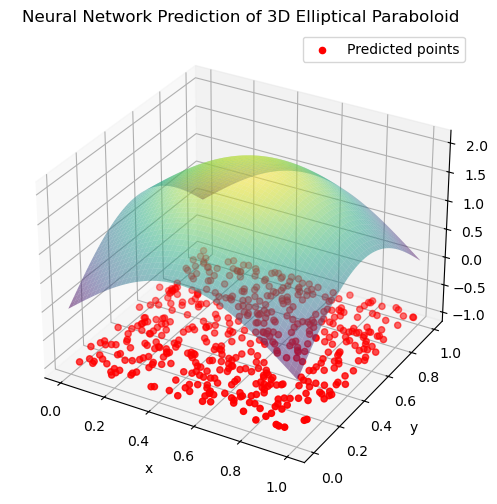

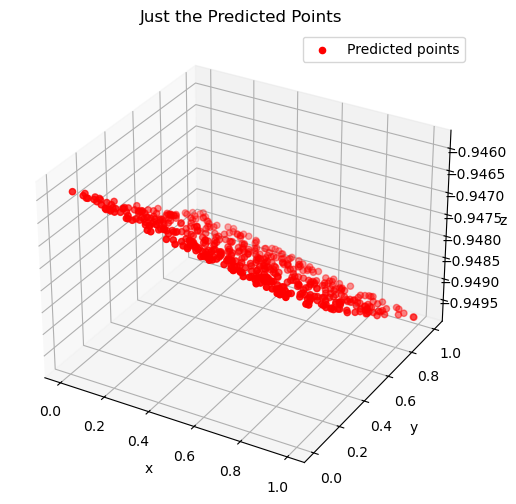

In [75]:
w,b = np_init.initializer(parameters["neurons"], "xavier")
#before training:
predicted = []
for data in in_data:
    pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
    predicted.append(pred)

predicted_Z = predicted 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
ax.set_title('Neural Network Prediction of 3D Elliptical Paraboloid')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Just the Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [76]:
loss_values = []
for i in tqdm(range(parameters["epochs"])):
  np_learn.learn(in_data,out_data, w ,b, parameters)
  predicted = []
  for data in in_data:
      pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
      predicted.append(pred)

  predicted = np.array(predicted)
  mse = np_loss.MSE_error(out_data, predicted)
  loss_values.append(mse)


100%|██████████| 500/500 [13:58<00:00,  1.68s/it]


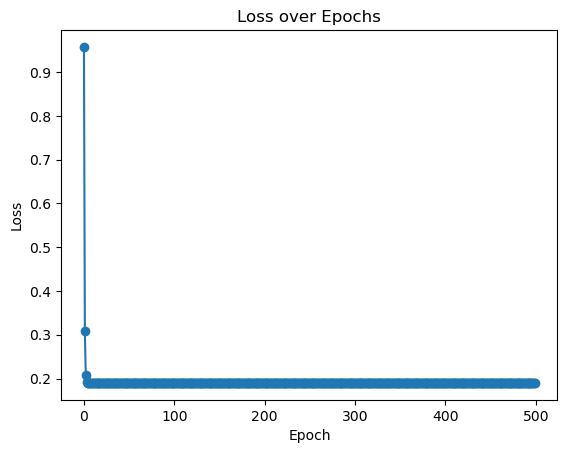

In [77]:

plt.plot(range(len(loss_values)), loss_values, '-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

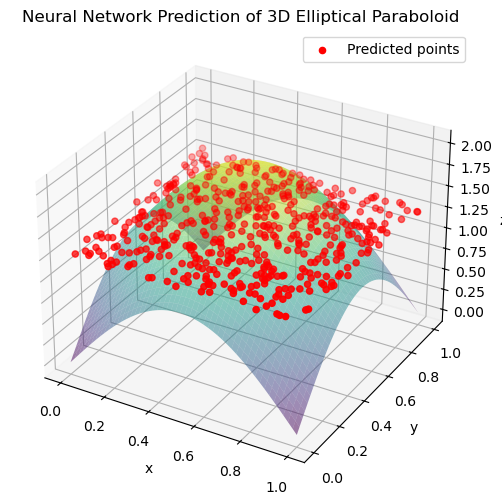

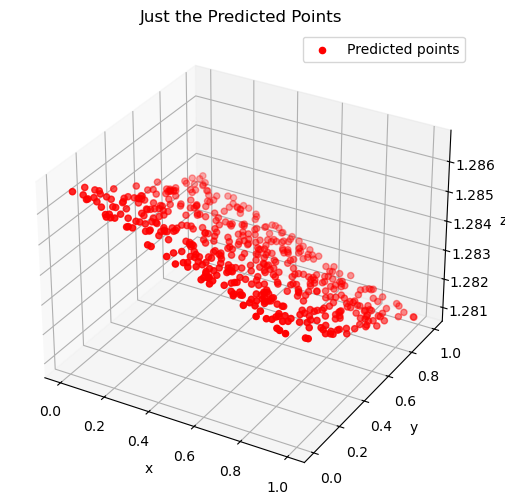

In [78]:
predicted_Z = predicted #since this only carries the value from the last learn iteration
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Neural Network Prediction of 3D Elliptical Paraboloid')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, predicted_Z, color='red', label='Predicted points')
ax.set_title('Just the Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [ ]:
#why does regression behave so strangely, need to investigate this